In [1]:
from ndb import NDB
import os
import librosa
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
folder_path = 'validation_audio'
sample_rate = 16000

wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

validation_audio_data = []

for wav_file in tqdm(wav_files):
    file_path = os.path.join(folder_path, wav_file)
    audio, _ = librosa.load(file_path, sr=sample_rate)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    validation_audio_data.append(mel_spec)

validation_audio_data = np.array(validation_audio_data).reshape((len(validation_audio_data), -1))

  0%|          | 0/3388 [00:00<?, ?it/s]

In [3]:
folder_path = 'gan_inference'
sample_rate = 16000

wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

gan_data = []

for wav_file in tqdm(wav_files):
    file_path = os.path.join(folder_path, wav_file)
    audio, _ = librosa.load(file_path, sr=sample_rate)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    gan_data.append(mel_spec)

gan_data = np.array(gan_data).reshape((len(gan_data), -1))

  0%|          | 0/1024 [00:00<?, ?it/s]

In [4]:
folder_path = 'vae_inference'
sample_rate = 16000

wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

vae_data = []

for wav_file in tqdm(wav_files):
    file_path = os.path.join(folder_path, wav_file)
    audio, _ = librosa.load(file_path, sr=sample_rate)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    vae_data.append(mel_spec)

vae_data = np.array(vae_data).reshape((len(vae_data), -1))

  0%|          | 0/1024 [00:00<?, ?it/s]

In [5]:
folder_path = 'vaegan_inference'
sample_rate = 16000

wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

vaegan_data = []

for wav_file in tqdm(wav_files):
    file_path = os.path.join(folder_path, wav_file)
    audio, _ = librosa.load(file_path, sr=sample_rate)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    vaegan_data.append(mel_spec)

vaegan_data = np.array(vaegan_data).reshape((len(vaegan_data), -1))

  0%|          | 0/1024 [00:00<?, ?it/s]

In [6]:
validation_ndb = NDB(training_data=validation_audio_data, number_of_bins=100, significance_level=0.05, z_threshold=None,
                 whitening=True, max_dims=None)

Performing K-Means clustering of 3388 samples in dimension 1365 / 8192 to 100 clusters ...
Can take a couple of minutes...


/home/mateo/mambaforge/envs/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Done.


In [7]:
validation_ndb.evaluate(gan_data, model_label='gan')

Calculating bin assignments for 1024 samples...
....................................................................................................
Results for 1024 samples from gan: NDB = 46 NDB/K = 0.46 , JS = 0.327890223955732


{'NDB': 46,
 'JS': 0.327890223955732,
 'Proportions': array([0.00585938, 0.        , 0.02929688, 0.00097656, 0.00488281,
        0.00097656, 0.        , 0.0078125 , 0.00097656, 0.00585938,
        0.0078125 , 0.03320312, 0.07617188, 0.00683594, 0.00097656,
        0.07128906, 0.00097656, 0.00683594, 0.01171875, 0.02441406,
        0.00390625, 0.05761719, 0.00585938, 0.00097656, 0.        ,
        0.        , 0.04785156, 0.00488281, 0.00292969, 0.00488281,
        0.06152344, 0.01269531, 0.        , 0.        , 0.00585938,
        0.00683594, 0.05273438, 0.        , 0.00097656, 0.00390625,
        0.03320312, 0.046875  , 0.        , 0.0078125 , 0.00195312,
        0.00878906, 0.00195312, 0.015625  , 0.00292969, 0.01660156,
        0.00195312, 0.015625  , 0.05664062, 0.00292969, 0.00097656,
        0.02148438, 0.        , 0.00488281, 0.015625  , 0.01367188,
        0.00097656, 0.04882812, 0.00097656, 0.        , 0.00976562,
        0.015625  , 0.        , 0.00488281, 0.00292969, 0.00195

In [8]:
validation_ndb.evaluate(vae_data, model_label='vae')

Calculating bin assignments for 1024 samples...
....................................................................................................
Results for 1024 samples from vae: NDB = 29 NDB/K = 0.29 , JS = 0.13762764818103135


{'NDB': 29,
 'JS': 0.13762764818103135,
 'Proportions': array([0.0390625 , 0.00195312, 0.01464844, 0.02929688, 0.03320312,
        0.0234375 , 0.01855469, 0.04785156, 0.04492188, 0.04296875,
        0.02148438, 0.04882812, 0.05664062, 0.04785156, 0.01953125,
        0.03222656, 0.01171875, 0.05957031, 0.00097656, 0.00683594,
        0.01855469, 0.00390625, 0.00097656, 0.02050781, 0.00390625,
        0.00390625, 0.00390625, 0.00195312, 0.        , 0.01953125,
        0.09082031, 0.00195312, 0.00390625, 0.01269531, 0.00292969,
        0.00195312, 0.01074219, 0.01464844, 0.00195312, 0.00585938,
        0.00585938, 0.05273438, 0.00097656, 0.00683594, 0.00292969,
        0.00390625, 0.00292969, 0.01074219, 0.00390625, 0.00390625,
        0.00488281, 0.01953125, 0.00878906, 0.00488281, 0.00292969,
        0.00488281, 0.00195312, 0.00195312, 0.0078125 , 0.        ,
        0.        , 0.00585938, 0.        , 0.        , 0.00390625,
        0.        , 0.        , 0.00976562, 0.00097656, 0.   

In [9]:
validation_ndb.evaluate(vaegan_data, model_label='vae-gan')

Calculating bin assignments for 1024 samples...
....................................................................................................
Results for 1024 samples from vae-gan: NDB = 36 NDB/K = 0.36 , JS = 0.2500337819491478


{'NDB': 36,
 'JS': 0.2500337819491478,
 'Proportions': array([0.01171875, 0.        , 0.0078125 , 0.00097656, 0.03613281,
        0.00585938, 0.00683594, 0.01953125, 0.00195312, 0.01074219,
        0.015625  , 0.0234375 , 0.02050781, 0.01367188, 0.0078125 ,
        0.09375   , 0.00195312, 0.03515625, 0.03515625, 0.04492188,
        0.04199219, 0.0078125 , 0.        , 0.01953125, 0.05664062,
        0.00390625, 0.00195312, 0.01074219, 0.07226562, 0.05273438,
        0.01171875, 0.00878906, 0.00585938, 0.00195312, 0.00195312,
        0.07910156, 0.02441406, 0.00683594, 0.00585938, 0.00292969,
        0.        , 0.01269531, 0.00683594, 0.        , 0.00292969,
        0.00390625, 0.00292969, 0.00683594, 0.00097656, 0.01171875,
        0.        , 0.01953125, 0.00097656, 0.00292969, 0.00097656,
        0.05078125, 0.03125   , 0.00390625, 0.01660156, 0.00195312,
        0.        , 0.00585938, 0.00097656, 0.        , 0.        ,
        0.        , 0.        , 0.00097656, 0.        , 0.    

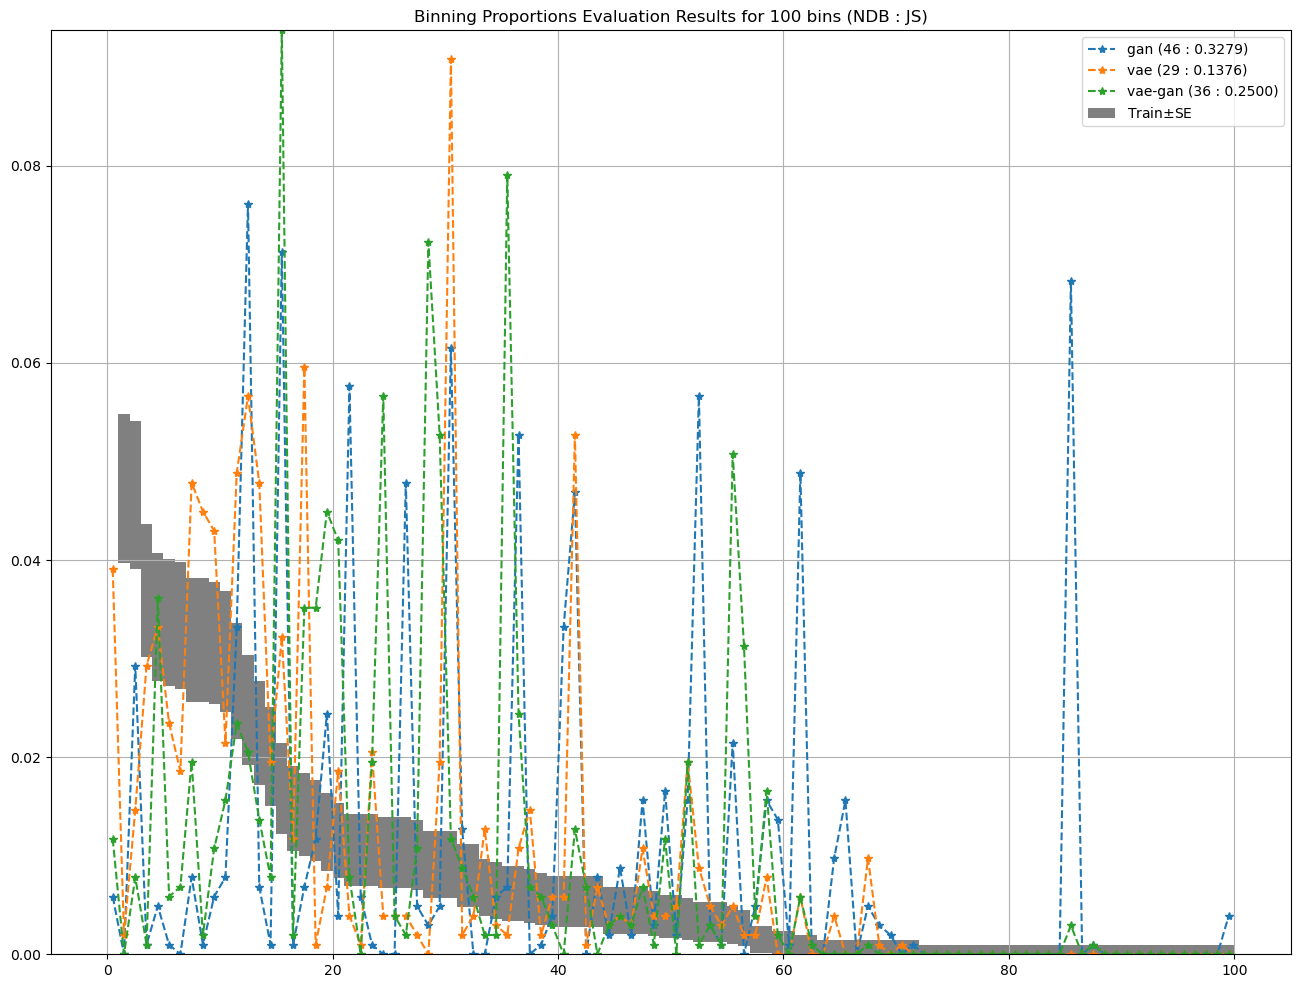

In [10]:
plt.rcParams["figure.figsize"] = (16,12)

validation_ndb.plot_results()

plt.savefig("NDB.png")